# Возьмем обработанные данные на прошлом занятие и еще немного преобразуем для выявления зависимотей .

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import preprocessing as pr

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/programmer1sss/ML/main/Data/prepared_ad_conversion.csv')
df.head()

,Unnamed: 0,id,full name,gender,age bucket,age,color scheme,seen count,followed ad,made purchase,ad effectiveness,user rating
0,0,12001,Dan Ferguson,M,18-35,18,green,0.777778,0,0,0.000000,1
1,1,12002,Justin Gibson,M,35-99,41,blue,0.333333,1,1,0.333333,5
2,2,12005,Wendy Sharp,F,35-99,40,blue,0.000000,0,0,NaN,1
3,3,12007,Ryan Hart,M,6-18,16,blue,0.555556,1,0,0.100000,5
4,4,12009,Wendy Poole,F,18-35,29,blue,0.888889,0,0,0.000000,1


In [26]:
df.columns

Index(['Unnamed: 0', 'id', 'full name', 'gender', 'age bucket', 'age',
       'color scheme', 'seen count', 'followed ad', 'made purchase',
       'ad effectiveness', 'user rating'],
      dtype='object')

## Удалим колонки не представляющие интерес

In [27]:
df.drop(columns=['Unnamed: 0', 'id', 'full name'], inplace=True)

In [28]:
df.head()

,gender,age bucket,age,color scheme,seen count,followed ad,made purchase,ad effectiveness,user rating
0,M,18-35,18,green,0.777778,0,0,0.000000,1
1,M,35-99,41,blue,0.333333,1,1,0.333333,5
2,F,35-99,40,blue,0.000000,0,0,NaN,1
3,M,6-18,16,blue,0.555556,1,0,0.100000,5
4,F,18-35,29,blue,0.888889,0,0,0.000000,1


## Переведем категории данные в числовые

In [29]:
for z in range(len(df)):
    if df.at[z, "age bucket"] =='6-18':
        df.at[z, "age bucket"] = 1
    elif df.at[z, "age bucket"] =='18-35':
        df.at[z, "age bucket"] = 2
    elif df.at[z, "age bucket"] =='35-99':
        df.at[z, "age bucket"] =  3
    else:
        df.at[z, "age bucket"] =  0

df = df.astype({"age bucket": "int64"})

In [30]:


class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pr.LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname,col in output.iteritems():
                output[colname] = pr.LabelEncoder().fit_transform(col.astype(str))
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [31]:
df=MultiColumnLabelEncoder(columns = ['gender','color scheme']).fit_transform(df)

## При помощи визуализации посмотрим на распределения данных

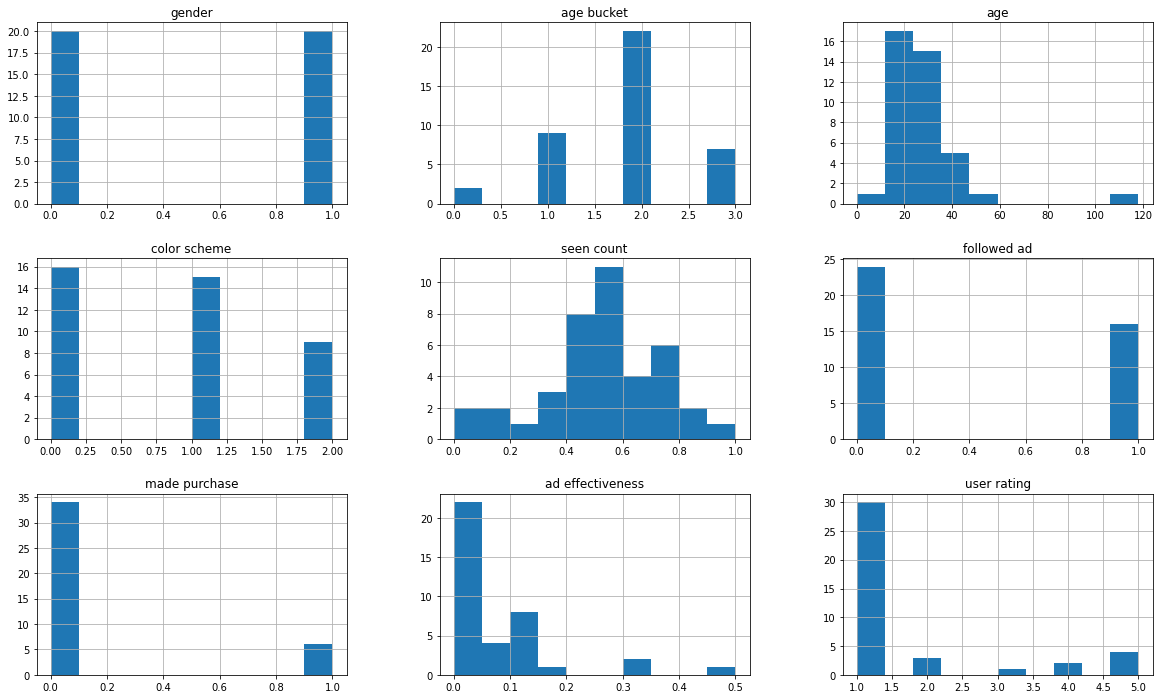

In [33]:
df.hist(figsize=(20, 12));

### Из графиков можно сделать выводы :

#### 1.Пол распределен равномерно
#### 2.Цвета распределены не равномерно
#### 3.Очень маленькую эфективность рекламы
#### 4.Большое количество негативных отзывов
#### 5.Маленькое число покупок

## Посмотрим на зависимость данных между собой при помощи корреляции

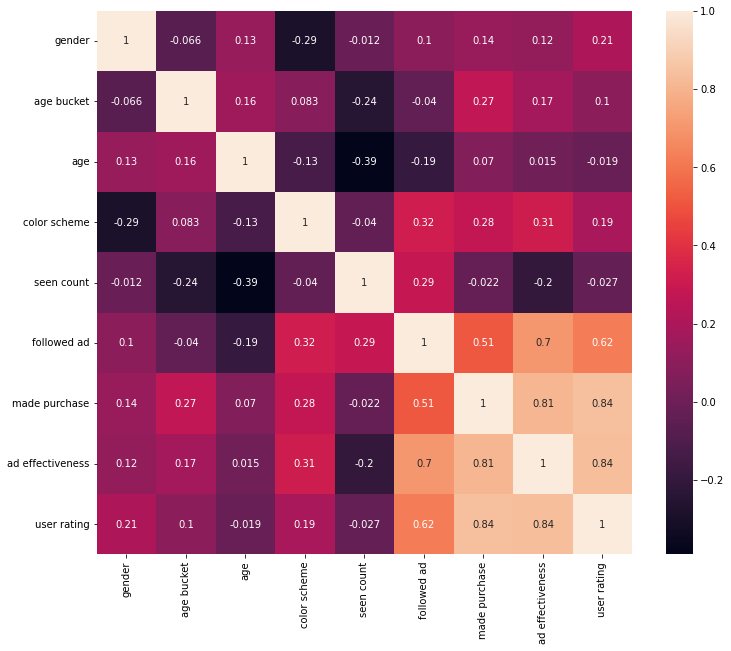

In [35]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True);

#### Из схемы можно сделать выводы:

##### Зависимость большую  'made purchase' от 'user rating'
##### Зависимость большую  'ad effectiveness' от 'seen count'
##### Зависимость большую  'user rating' от 'followed ad'
##### Зависимость большую  'made purchase' от 'followed ad'

##  Рассмотрим подробнее

<AxesSubplot:xlabel='made purchase', ylabel='count'>

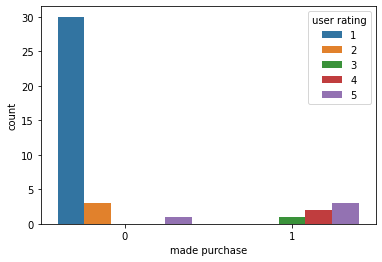

In [36]:
sns.countplot( x = 'made purchase' ,data= df,hue='user rating' )

<AxesSubplot:xlabel='ad effectiveness', ylabel='count'>

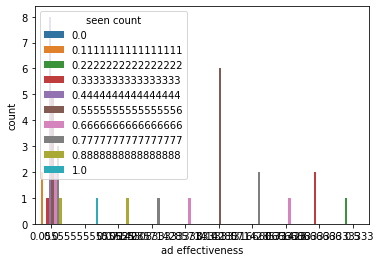

In [37]:
sns.countplot( x = 'ad effectiveness' ,data= df,hue='seen count' )

<AxesSubplot:xlabel='user rating', ylabel='count'>

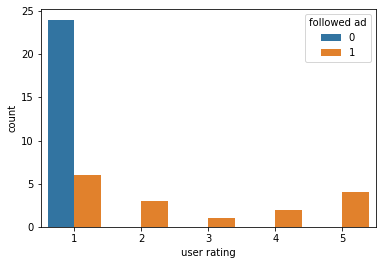

In [38]:
sns.countplot( x = 'user rating' ,data= df,hue='followed ad' )

### Еще парочку иследования

<AxesSubplot:xlabel='gender', ylabel='count'>

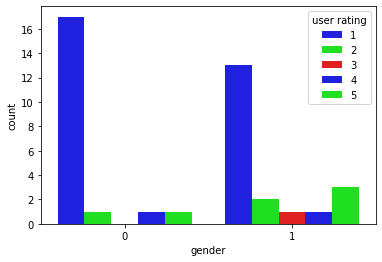

In [39]:
sns.countplot( x = 'gender' ,data= df,hue='user rating',palette=['#0000ff','#00ff00','#ff0000'] )